In [1]:
import numpy as np
import pandas as pd

In [2]:
gt = np.load('gt_20.npy')
pr = np.load('pr_20.npy')

In [3]:
len(pr)

198

In [4]:
import xarray as xr

In [5]:
ds = xr.open_dataset('compress.isosph.CESM2-FV2.historical.r1i1p1f1.Output.nc')

In [6]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
lon_list = ds.lon.data
lat_list = ds.lat.data

In [8]:
import random

In [9]:
#random timestep
t = random.randint(1, len(pr))
print(t)

85


In [11]:
gt.shape

(198, 1, 1, 40962)

In [12]:
gt_tas = gt[t, 0, 0, :]
#gt_psl = gt[t, 0, 1, :]
#gt_pr = gt[t, 0, 2, :]

pr_tas = pr[t, 0, 0, :]
#pr_psl = pr[t, 0, 1, :]
#pr_pr = pr[t, 0, 2, :]

In [13]:
np.set_printoptions(threshold=np.inf)

In [14]:
print(gt_tas)

[0.56001351 0.47213816 0.43436818 0.46596416 0.44450528 0.46173602
 0.57269816 0.52652946 0.53720455 0.5500325  0.45821652 0.53521455
 0.46772552 0.50311324 0.48998256 0.47191526 0.51306559 0.49886495
 0.4464665  0.49993859 0.51940693 0.53532979 0.46332581 0.45971394
 0.44546601 0.51411358 0.45321303 0.5292481  0.48589274 0.50032403
 0.45553126 0.32608432 0.48747444 0.58676792 0.45003423 0.45761683
 0.44974218 0.50473139 0.40976534 0.43983354 0.57134869 0.50112795
 0.61329388 0.45101744 0.52765458 0.54187377 0.42771525 0.43277863
 0.43834339 0.47247019 0.55842071 0.52453081 0.52812862 0.47023414
 0.48933412 0.54877769 0.46332336 0.50760775 0.57672887 0.52788405
 0.45908491 0.60183052 0.49464915 0.51342798 0.53885112 0.54832971
 0.55276134 0.53267161 0.50017535 0.55456591 0.46585895 0.50091578
 0.4576389  0.43051107 0.37109638 0.51875259 0.51180447 0.34180018
 0.53829802 0.48182533 0.59928685 0.48180979 0.51404065 0.43558506
 0.47675526 0.4909196  0.4441574  0.57681229 0.54422843 0.4976

In [15]:

print(pr_tas)

[0.4909825  0.4909825  0.4909825  0.4909825  0.4909825  0.4909825
 0.4909825  0.4909825  0.4909825  0.4909825  0.4909825  0.4909825
 0.49100733 0.49100733 0.49100733 0.49100733 0.49100733 0.49100733
 0.49100733 0.49100733 0.49100733 0.49100733 0.49100733 0.49100733
 0.49100733 0.49100733 0.49100733 0.49100733 0.49100733 0.49100733
 0.49100733 0.49100733 0.49100733 0.49100733 0.49100733 0.49100733
 0.49100733 0.49100733 0.49100733 0.49100733 0.49100733 0.49100733
 0.4909506  0.4909506  0.4909506  0.4909506  0.4909506  0.4909506
 0.4909506  0.4909506  0.4909506  0.4909506  0.4909506  0.4909506
 0.4909506  0.4909506  0.49103874 0.4909506  0.4909506  0.4910387
 0.4910387  0.4909506  0.4909506  0.49103874 0.4909506  0.4909506
 0.4910387  0.4910387  0.4909506  0.4909506  0.4909506  0.4909506
 0.49103874 0.49103874 0.4909506  0.4909506  0.4910387  0.49103874
 0.4910387  0.4909506  0.4909506  0.4910387  0.4910387  0.4909506
 0.4909506  0.4910387  0.4910387  0.4909506  0.4909506  0.49103874
 0.

In [16]:
import seaborn as sns

/opt/anaconda3/envs/aibedo/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

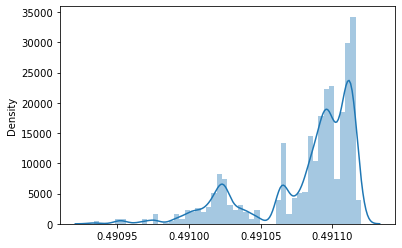

In [17]:
sns.distplot(pr_tas)

/opt/anaconda3/envs/aibedo/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

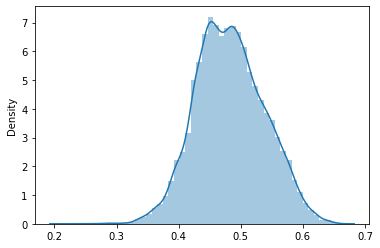

In [18]:
sns.distplot(gt_tas)

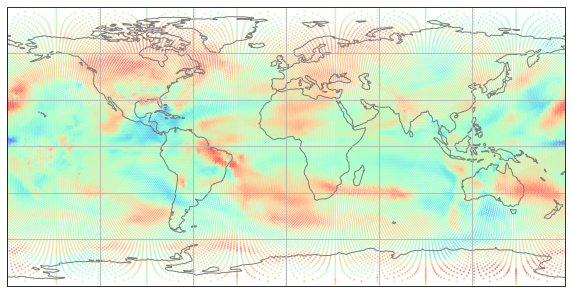

In [19]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=lon_list, y=lat_list,
            c=gt_tas,
            s=1,
            alpha=0.5,
            cmap='rainbow',
            transform=crs.PlateCarree()) ## Important

plt.show()

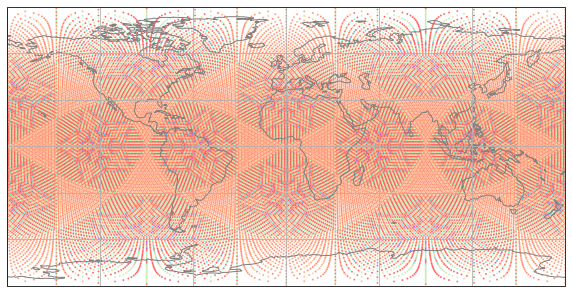

In [20]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=lon_list, y=lat_list,
            c=pr_tas,
            s=1,
            alpha=0.5,
            cmap='rainbow',
            transform=crs.PlateCarree()) ## Important

plt.show()

In [35]:
def rmse(a1, a2):
    return np.sqrt(np.mean((a1-a2)**2))

In [36]:
error_list = []
for i in range(len(gt)):
    error_list.append(rmse(gt[i,:,0], pr[i,:,0]))

In [37]:
lsmask_round = [round(x) for x in ds.lsMask.data[0]] 
lsmask_round = [0 if x < 0 else round(x) for x in lsmask_round ]
lsmask_round = [1 if x > 1 else round(x) for x in lsmask_round ]

In [38]:
zipped = list(zip(lon_list, lat_list, error_list, lsmask_round))

In [39]:
df = pd.DataFrame(zipped, columns=['Lon', 'Lat', 'error', 'lsmask'])

In [40]:
tropic = df[(df.Lat<30) & (df.Lat>-30)]

In [41]:
temperate = df[((df.Lat>30) & (df.Lat<60)) | ((df.Lat <-30 ) & (df.Lat > -60)) ]

In [42]:
arctic = df[(df.Lat>60)]

In [43]:
antarctic = df[(df.Lat < -60)]

In [44]:
land = df[(df.lsmask ==1)]

In [45]:
sea = df[(df.lsmask == 0)]

In [48]:
import seaborn as sns
sns.set_theme(style="white")
sns.set_style("ticks")

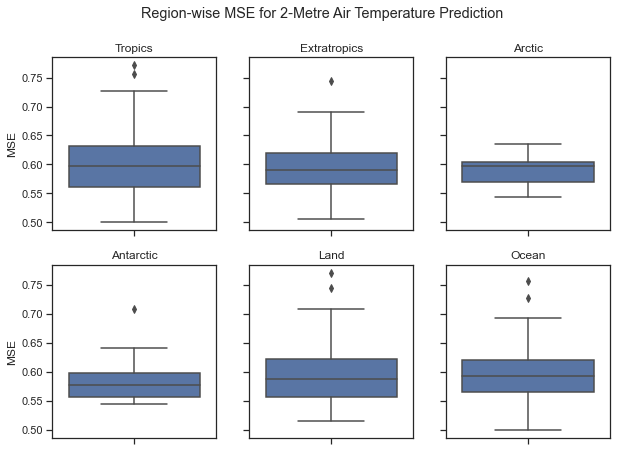

In [56]:
fig, axes = plt.subplots(figsize =(10, 7), nrows=2, ncols=3, sharey=True) # create 2x2 array of subplots
sns.boxplot(data=tropic, y = "error", ax=axes[0,0]).set(title="Tropics", ylabel="MSE")
sns.boxplot(data=temperate, y = "error", ax=axes[0,1]).set(title="Extratropics", ylabel="")
sns.boxplot(data=arctic, y = "error", ax=axes[0,2]).set(title="Arctic", ylabel="")
sns.boxplot(data=antarctic, y = "error", ax=axes[1,0]).set(title="Antarctic", ylabel="MSE")
sns.boxplot(data=land, y = "error", ax=axes[1,1]).set(title="Land", ylabel="")
sns.boxplot(data=sea, y = "error", ax=axes[1,2]).set(title="Ocean", ylabel="")
fig.suptitle('Region-wise MSE for 2-Metre Air Temperature Prediction')
plt.show()